<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk import word_tokenize, wordpunct_tokenize, RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer

In [3]:
import spacy

In [4]:
nlp = spacy.load("it_core_news_sm")

In [5]:
df = pd.read_csv("data/all.csv")

In [6]:
df.head()

,Unnamed: 0,Data,Rating,Titolo,Testo,Locale
0,0,2022-01-31,10,Non ci siamo per niente,Sono stata con amici per un brunch e sono rima...,melzideril
1,1,2022-01-05,20,Si mangia insieme ai moscerini,Il cibo è buono ma da un po’ di tempo ci sono ...,melzideril
2,2,2021-10-12,20,"Poco pulizia , e molta sgarbatezza .","Mosche sulle brioche , insetti in bagno . Poco...",melzideril
3,3,2021-09-06,20,Mai più,Il locale non sembra pulito e il dehor è propr...,melzideril
4,4,2021-08-02,10,"Pandenus, che succede?","Servizio inesistente. Sono entrata, totale cli...",melzideril


In [7]:
df = df.drop("Unnamed: 0", axis=1)

In [8]:
df["Rating"] = (df["Rating"]/10).astype("int")

In [9]:
df["Label"] = df["Rating"].apply(lambda x: 1 if x>3 else -1)

In [17]:
df.head()

,Data,Rating,Titolo,Testo,Locale,Label
0,2022-01-31,1,Non ci siamo per niente,Sono stata con amici per un brunch e sono rima...,melzideril,-1
1,2022-01-05,2,Si mangia insieme ai moscerini,Il cibo è buono ma da un po’ di tempo ci sono ...,melzideril,-1
2,2021-10-12,2,"Poco pulizia , e molta sgarbatezza .","Mosche sulle brioche , insetti in bagno . Poco...",melzideril,-1
3,2021-09-06,2,Mai più,Il locale non sembra pulito e il dehor è propr...,melzideril,-1
4,2021-08-02,1,"Pandenus, che succede?","Servizio inesistente. Sono entrata, totale cli...",melzideril,-1


In [11]:
def word_cloud(text):

    # Create stopword list
    stopword_list = set(stopwords.words("italian"))
    stopword_list != {"posto, euro, pandenus, tadino, mercato, molto"}

    # Create WordCloud 
    word_cloud = WordCloud(width = 550, height = 550, 
                           max_words=50,
                           background_color ='white', 
                           stopwords = stopword_list, 
                           min_font_size = 12).generate(text) 
    # Set wordcloud figure size
    plt.figure(figsize = (8, 6)) 
    # Show image
    plt.imshow(word_cloud) 
    # Remove Axis
    plt.axis("off")  
    # show plot
    plt.show()    

In [15]:
def reviews_to_list(df):
    return ' '.join(df.Testo.tolist())

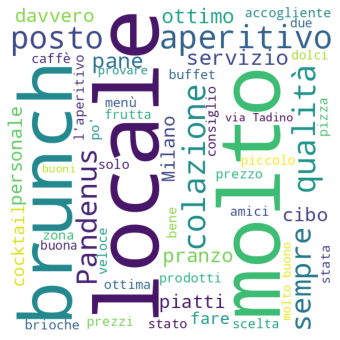

In [188]:
word_cloud(reviews_to_list(df[df["Label"]==1]))

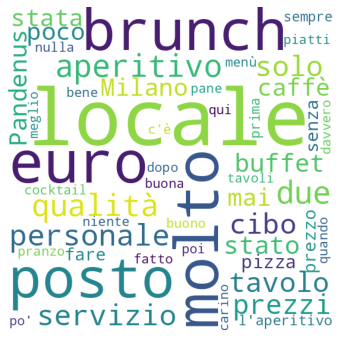

In [189]:
word_cloud(reviews_to_list(df[df["Label"]==-1]))

In [211]:
stemmer = SnowballStemmer(language="italian", ignore_stopwords=True)

In [26]:
reviews_list = df["Testo"].tolist()

In [27]:
reviews_list[:3]

['Sono stata con amici per un brunch e sono rimasta molto delusa. Locale sporco, pieno di moscerini, cibo pessimo. Mai più.',
 'Il cibo è buono ma da un po’ di tempo ci sono tantissimi moscerini e sinceramente non è il massimo . Forse bisogna chiamare qualche società che faccia la disinfestazione. Oggi è stata dura mangiare',
 'Mosche sulle brioche , insetti in bagno . Poco pulizia . Modi sorprendentemente sgarbati da parte della ragazza in cassa la quale ha inizialmente rifiutato il pagamento con monete . Poco attenzione verso il cliente . Molto delusi .']

In [273]:
stemmed_list = []
tokenizer = RegexpTokenizer(r'\w+')
for sentence in reviews_list:
    sentence = stemmer.stem(sentence)
    sentence = tokenizer.tokenize(sentence)
    sentence = " ".join([word.lower() for word in sentence if word.isalpha()])
    stemmed_list.append(sentence)

In [293]:
stemmed_list[:3]

['location molto curata in una zona molto tranquilla e rilassante ottimo cocktail e stuzzichini buoni un pochino caro il conto ma consigl',
 'ci sono stato recentemente per colazione e ho trovato tutto eccellente fresco e di qualità quando sarò in zona ci tornerò senz altr',
 'aperitivi con amici non dico che ci si debba abbuffare ma nemmeno arrivare a disputarci l ultima oliva si può fare di più da rivedere']

In [294]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [276]:
from sklearn.svm import LinearSVC

In [277]:
X = stemmed_list  # this time we want to look at the text
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [278]:
from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])
# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [279]:
predictions = text_clf.predict(X_test)

In [280]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[124   6]
 [ 17  90]]


In [281]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

          -1       0.88      0.95      0.92       130
           1       0.94      0.84      0.89       107

    accuracy                           0.90       237
   macro avg       0.91      0.90      0.90       237
weighted avg       0.91      0.90      0.90       237



In [33]:
lemmatized = nlp((" ").join(reviews_list))

In [39]:
for token in lemmatized[:10]:
    print(token.text, token.has_vector, token.vector)

Sono True [-1.45745263e-01 -2.56588817e-01 -3.66763496e+00 -3.47339725e+00
  2.92612410e+00 -7.05098915e+00 -5.55103207e+00  6.50581360e-01
 -1.40630174e+00 -4.51778889e+00  4.43709612e+00 -4.01353359e+00
  1.69342053e+00 -8.01130056e-01 -4.62808609e+00 -3.75911903e+00
  1.62858844e-01  1.19624352e+00  2.15473747e+00 -2.96355867e+00
  5.29567957e-01 -3.18897104e+00  3.92487943e-01  1.52427840e+00
 -8.29146194e+00 -4.82465744e+00 -5.60655951e-01 -4.65502214e+00
  5.43074656e+00 -1.46819758e+00 -7.00867653e+00 -3.04539299e+00
 -2.22980881e+00  1.20410500e+01  3.12682295e+00  2.75466537e+00
 -2.16063499e+00  3.96239018e+00  7.28267765e+00 -4.93416262e+00
 -1.40401304e-01  1.22612114e+01 -2.09937930e-01  3.88603091e+00
  2.08824083e-01 -5.55986357e+00  1.52312422e+00 -2.51960588e+00
 -3.52571774e+00 -1.63787937e+00  3.02860951e+00  6.76875114e+00
  5.22766173e-01 -7.80712366e-02 -3.73024559e+00 -1.87806654e+00
 -3.92759991e+00 -4.06169701e+00  4.53438663e+00  1.49095714e+00
  9.86000729e+0